In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_imgs = glob.glob("/opt/ml/data/train/DCM/**/*")

In [3]:
idx = np.random.randint(len(train_imgs))

In [1]:
idx

NameError: name 'idx' is not defined

In [5]:

img_original = cv2.imread(train_imgs[0])

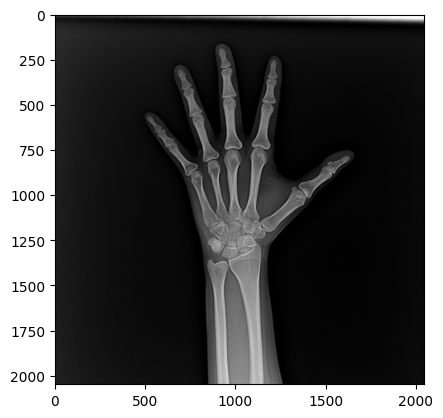

In [123]:
img = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
img_filt = cv2.medianBlur(img, 5)
plt.imshow(img_filt, cmap="gray")

In [124]:
img_filt.shape

(2048, 2048)

In [125]:
img.shape

(2048, 2048)

([], [])

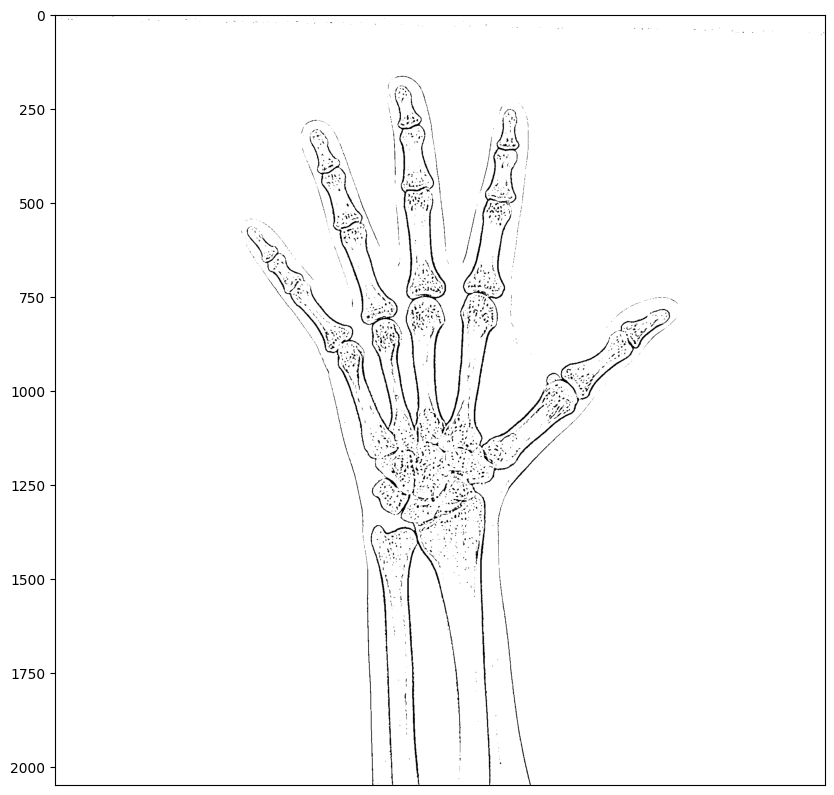

In [128]:

img_th = cv2.adaptiveThreshold(img_filt,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,5)
plt.figure(figsize=(10, 10))
plt.imshow(img_th, cmap='gray')
plt.xticks([])

In [70]:
contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# 접시와 음식에 해당하는 가장큰 윤곽선을 찾는다.
mask = np.zeros(img.shape, np.uint8)
largest_areas = sorted(contours, key=cv2.contourArea)
#검은색 배경에 가장큰 컨투어만 그림
cv2.drawContours(mask, [largest_areas[-2]], 0, (255,255,255,255), -1)
#입력이미지에서 가장 큰 컨투어만 추출
img_bigcontour = cv2.bitwise_and(img_original,img_original,mask = mask)

In [41]:
hsv_img = cv2.cvtColor(img_bigcontour, cv2.COLOR_BGR2HSV)

In [74]:
img_original.shape

(2048, 2048, 3)

In [107]:
cv2.imread(train_imgs[np.random.randint(len(train_imgs))]).shape

(2048, 2048, 3)

In [12]:
import random
samples = random.choices(train_imgs, k=3)

In [13]:
samples

['/opt/ml/data/train/DCM/ID131/image1662339793561.png',
 '/opt/ml/data/train/DCM/ID306/image1664241319690.png',
 '/opt/ml/data/train/DCM/ID530/image1667264252052.png']

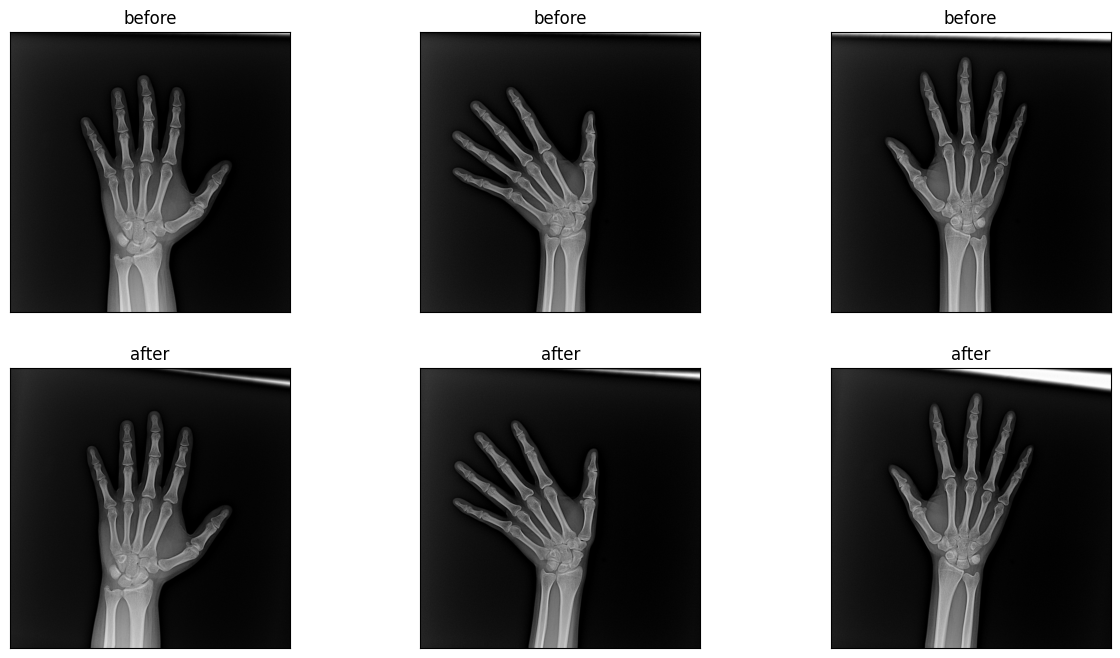

In [15]:
import albumentations as A
out = A.Rotate(limit=30, always_apply=True)(image=img_original[:,:,0])["image"]
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for i in range(2):
    for j in range(3):
        if i == 0:
            if j == 1:
                axes[i][j].set_title("before")
            axes[i][j].imshow(cv2.imread(samples[j]), cmap='gray')
        else:
            if j == 1:
                axes[i][j].set_title("after")
            axes[i][j].imshow(A.Rotate(limit=30, always_apply=True)(image=cv2.imread(samples[j]))['image'], cmap='gray')
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])

# plt.imshow(out, cmap="gray")

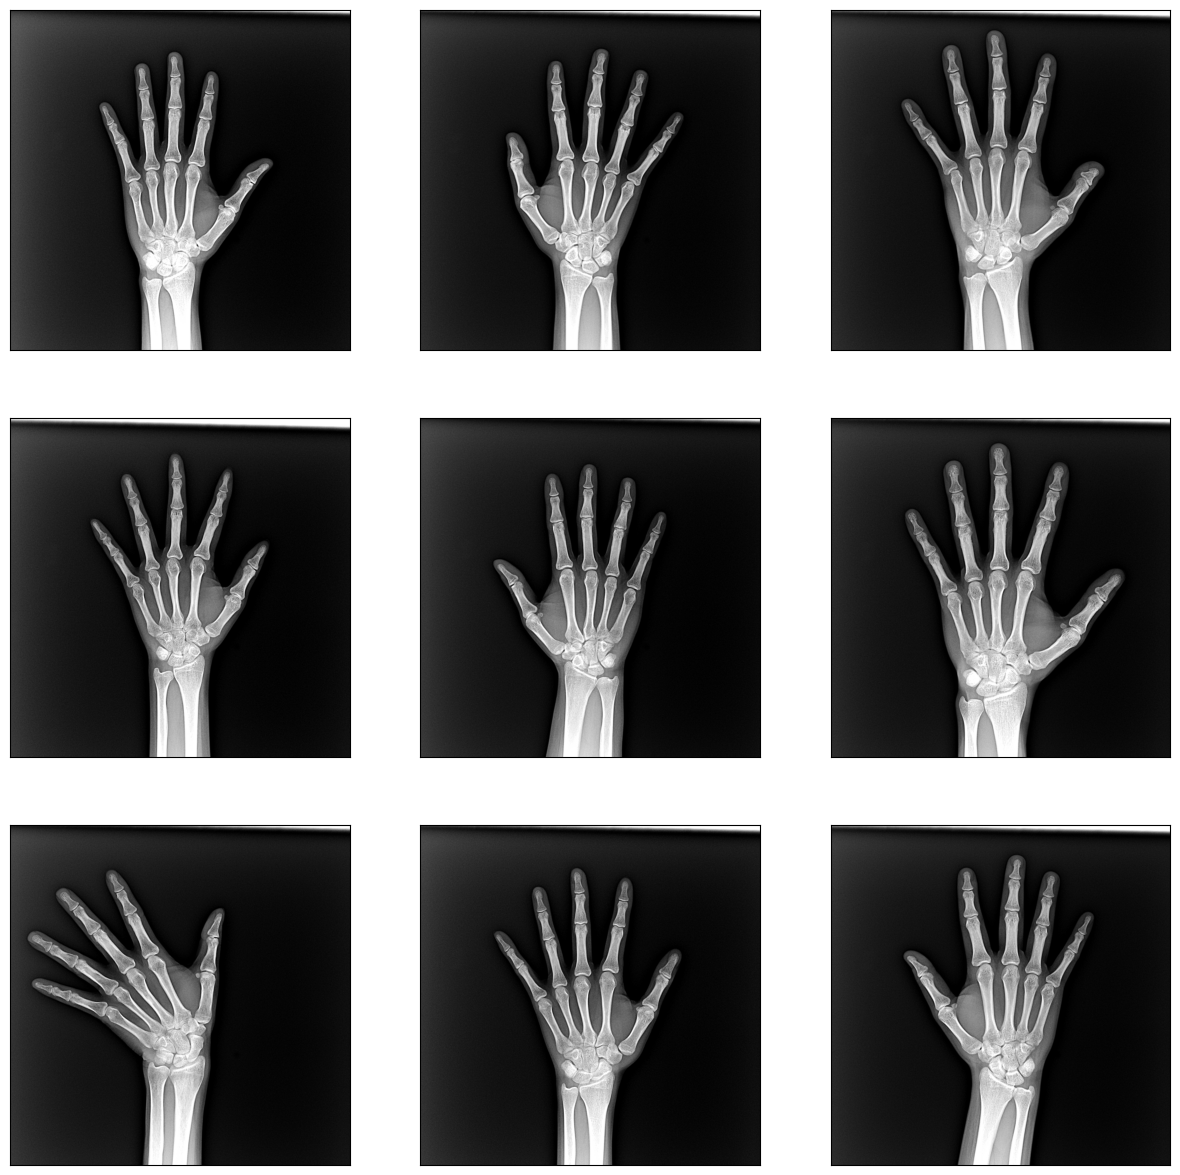

In [117]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i in range(3):
    for j in range(3):
        axes[i][j].imshow(A.RandomBrightnessContrast(brightness_limit=[0, 0],contrast_limit=[0.5, 0.5], p=1.)(image=cv2.imread(train_imgs[np.random.randint(len(train_imgs))]))["image"], cmap='gray')
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])

In [98]:
img_original[..., 0,np.newaxis].shape

(2048, 2048, 1)

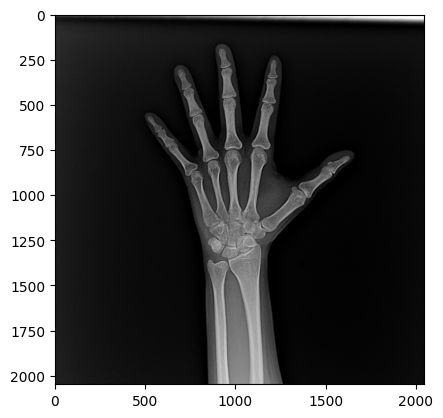

In [88]:
plt.imshow(out, cmap="gray")

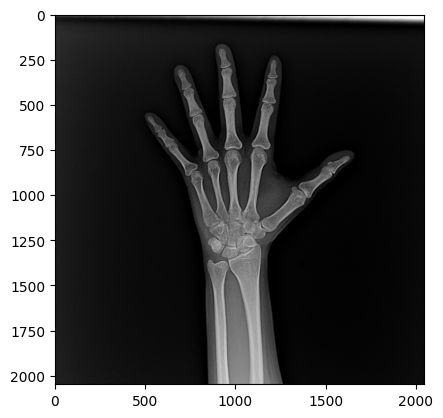

In [73]:
plt.imshow(img_original[:, :, 0], cmap="gray")

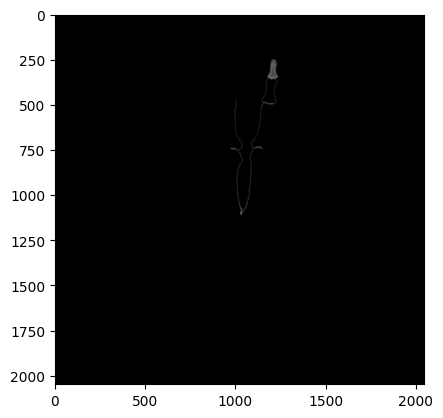

In [71]:
plt.imshow(img_bigcontour)

In [ ]:
#미디언 블러링으로 노이즈 제거
img_filt = cv2.medianBlur(img1, 5)
#이미지 이진화
img_th = cv2.adaptiveThreshold(img_filt,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# 접시와 음식에 해당하는 가장큰 윤곽선을 찾는다.
mask = np.zeros(img.shape, np.uint8)
largest_areas = sorted(contours, key=cv2.contourArea)
#검은색 배경에 가장큰 컨투어만 그림
cv2.drawContours(mask, [largest_areas[-1]], 0, (255,255,255,255), -1)
#입력이미지에서 가장 큰 컨투어만 추출
img_bigcontour = cv2.bitwise_and(img1,img1,mask = mask)

#hsv채널로 변경
hsv_img = cv2.cvtColor(img_bigcontour, cv2.COLOR_BGR2HSV)